In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1.Cleaning Data

In [13]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 3','Unnamed: 4'],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df=df.rename(columns={'v1':'Kind','v2':'Text'})
df

,Kind,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


2.Visualization Data

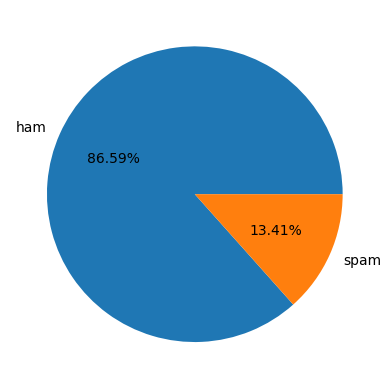

In [15]:
from matplotlib import pyplot as plt

spam=df['Kind'].value_counts()
plt.pie(x=spam.values,labels=spam.index,autopct="%1.2f%%")
plt.show()

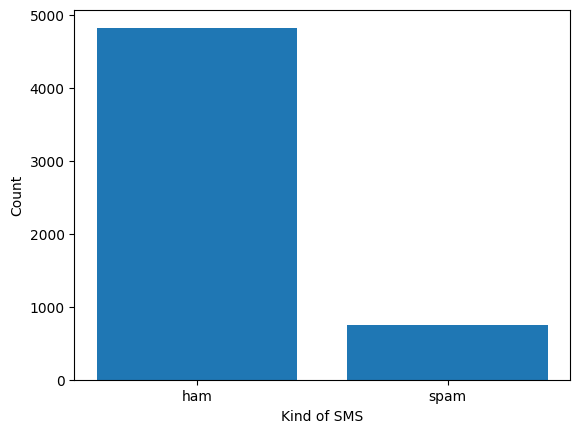

In [17]:
plt.bar(spam.index,spam.values)
plt.xlabel('Kind of SMS')
plt.ylabel('Count')
plt.show()

3.Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['Kind']=encoder.fit_transform(df['Kind'])
df

,Kind,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
ps=PorterStemmer()

In [25]:
def transform_text(text):

  # lowercase
  text=text.lower()
  # tokenize
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [26]:
df['Text']=df['Text'].apply(lambda x:transform_text(x))

4.DATA PREPARATION

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [32]:
X=df['Text']
y=df['Kind']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [34]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [42]:
y_pred=mnb.predict(X_test)
akurasi=accuracy_score(y_test,y_pred)
print(akurasi)

0.9641255605381166


In [43]:
cr=classification_report(y_test,y_pred)
print('\nReport:\n',cr)


Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



<Axes: >

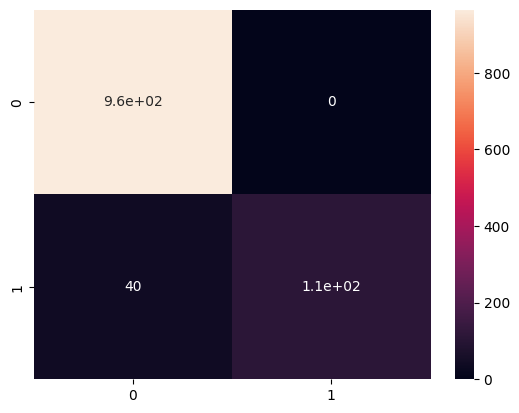

In [39]:
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [52]:
user=input("Masukkan Teks:")
user_transform=tfidf.transform([user])
result=mnb.predict(user_transform)
result_invers=encoder.inverse_transform(result)
result_invers

Masukkan Teks:free start in two weakly


array(['ham'], dtype=object)